# Generdor de gráficos FAFEF (Auditoría Superior de la Federación)

> Por: Jesús Octavio García Flores, octavio5545@ciencias.unam.mx, 2022

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(pd.read_excel("Fafef2021.xlsx"))

In [5]:
df

,Entidad Federativa,Saneamiento financiero,Saneamiento de pensiones
0,Total Nacional,4.551227e+09,1.165187e+10
1,Aguascalientes,NaN,NaN
2,Baja California,1.336790e+09,0.000000e+00
3,Baja California Sur,NaN,NaN
4,Campeche,NaN,NaN
5,Chiapas,NaN,NaN
6,Chihuahua,NaN,1.354399e+09
7,Ciudad de México,NaN,NaN
8,Coahuila de Zaragoza,NaN,NaN
9,Colima,2.757853e+08,NaN


In [6]:
color_palet = {'Encabezados': '#C4BDA3', 
               'Totales': '#91824D',
               'Beige1': '#A48A56', 
               'Beige2': '#B3A571',
               'Azul1': '#8D9CB1', 
               'Azul2': '#667A94',
               'Verde1': '#0C6B4D',
               'Verde2': '#569782',
               'Rojo1': '#9C2A29', 
               'Rojo2': '#B17253', 
               'Gris1': '#ABABAB', 
               'Gris2': '#D5D5D5', 
               'Gris3': '#B4B4B4'}
    
colores=[]
for color in color_palet:
    colores.append(color_palet[color])
    

In [43]:

def graficos_FAFEF(df, colores=None, seed=25, save_plots=True):
    try:
        os.mkdir('FAFEF_2021_plots')
    except:
        None
    
    df = df.fillna(float(0))
    df[df.columns[1]].astype(float)
    df[df.columns[2]].astype(float)
    #print(df)
    
    np.random.seed(seed)
    colores_plot = np.random.choice(colores, size=len(df.columns))
    
    campos = list(df.columns[1:])
    #print(campos)
    valores = [np.round(x/1e+6, 2)  for x in df.values[0][1:]]  
    max_val = max(valores)
    #print(valores)
    
    for i in range(len(campos)):
        plt.barh(y=campos[i], width=valores[i], color=colores_plot[i])
        plt.text(x=valores[i], y=i, s=str(valores[i]), size=18 )
        if max_val == 0:
            plt.xlim(0, 0.5 )
        else: 
            plt.xlim(0, max_val*1.4 )
    plt.title("FAFEF 2021 \n ({})".format(df[df.columns[0]].iloc[0]))
    #plt.legend( [str(x) + str(y) for x,y in zip(df.columns[1:], valores[1:] ) ], loc='best' )
    
    if save_plots:
            plt.savefig("FAFEF_2021_plots\{}_FAFEF_2021.png".format(df[df.columns[0]].iloc[0]), 
                    dpi=150, bbox_inches = 'tight')
    
    plt.show()

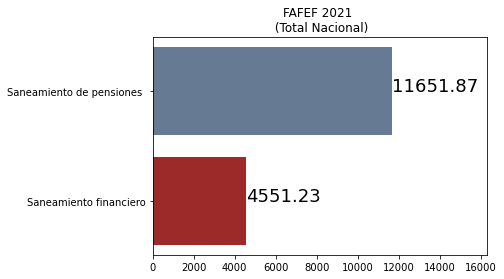

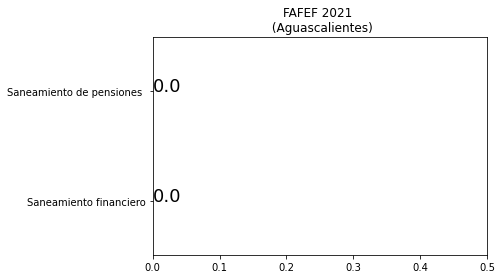

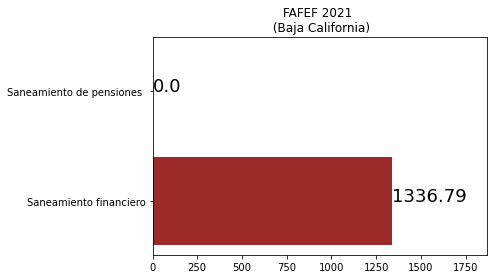

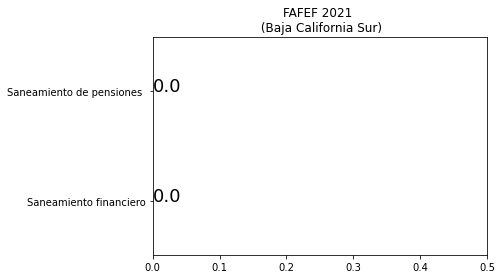

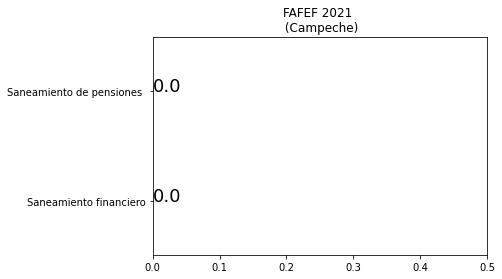

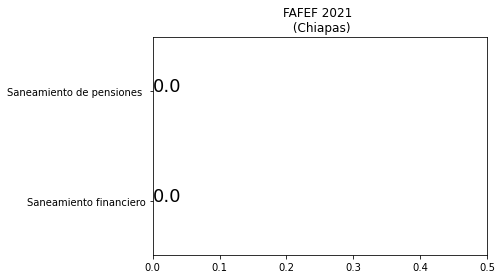

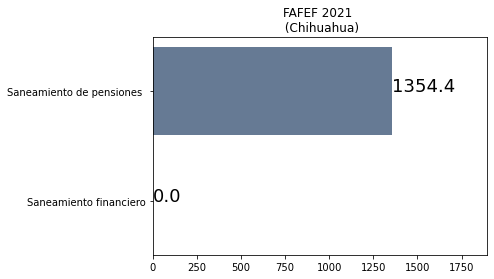

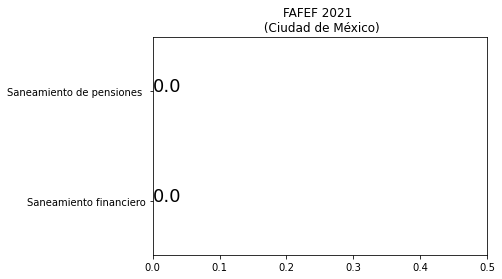

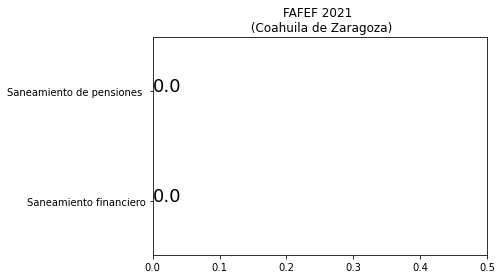

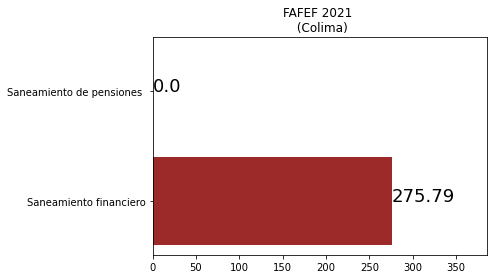

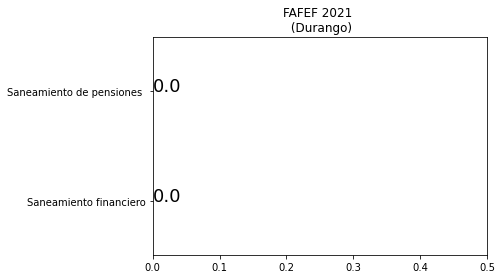

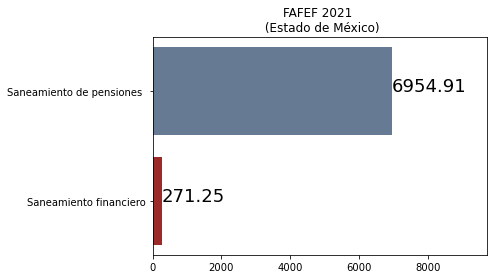

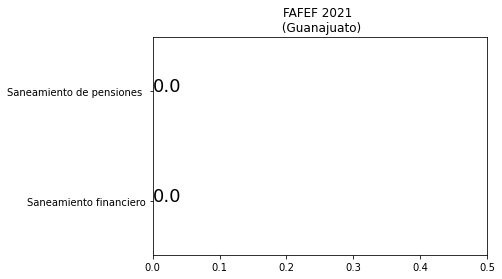

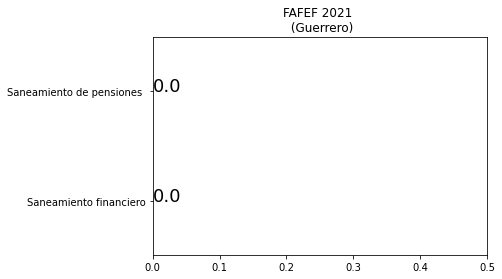

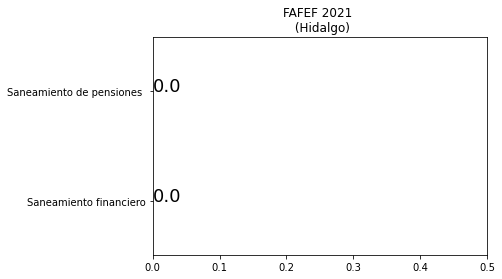

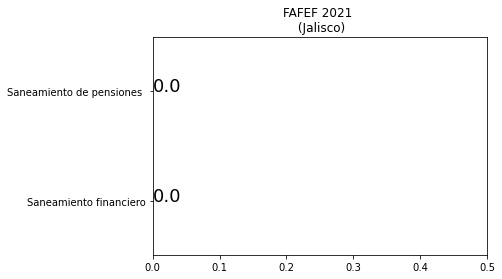

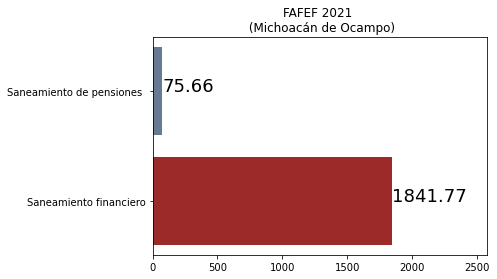

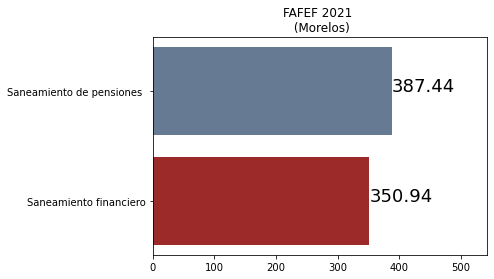

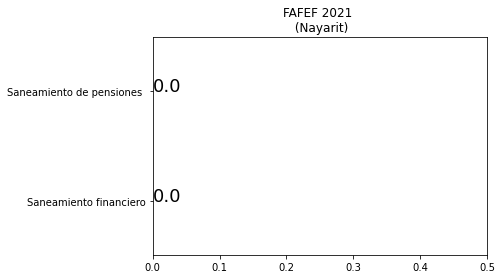

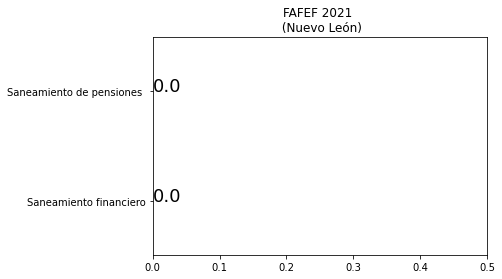

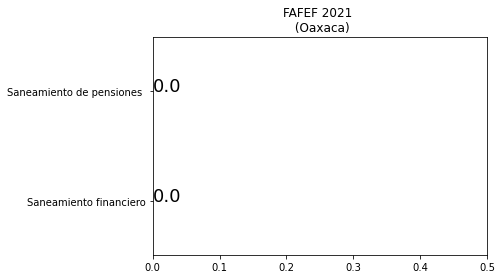

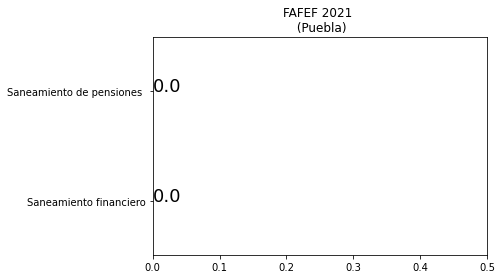

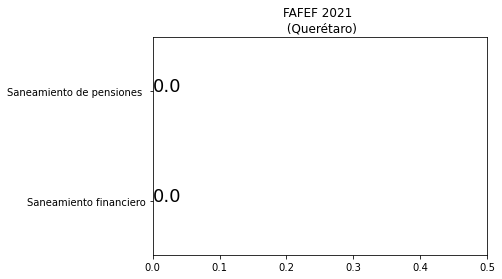

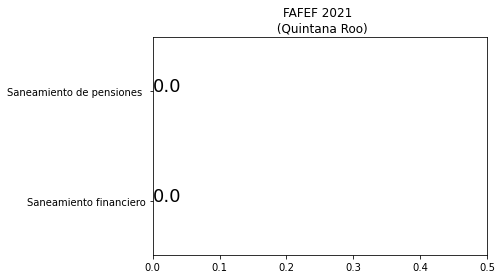

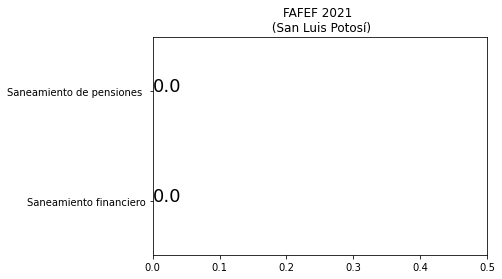

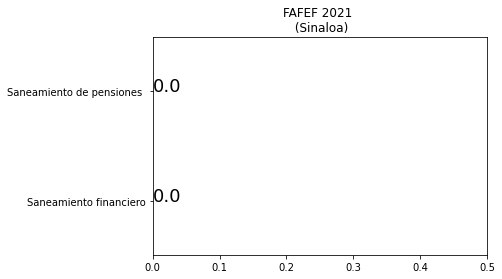

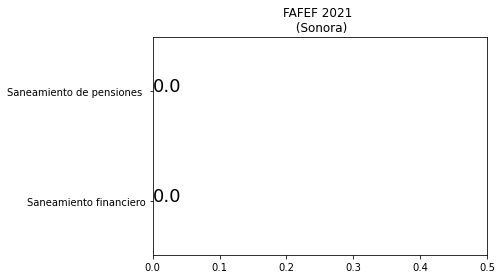

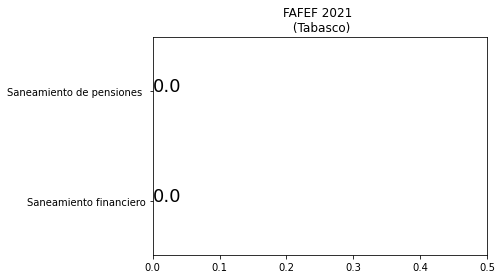

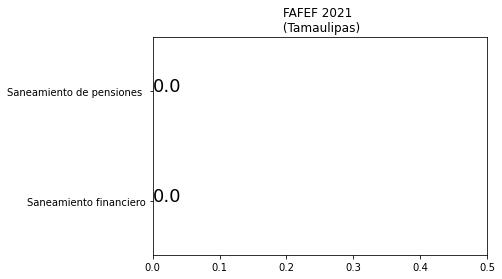

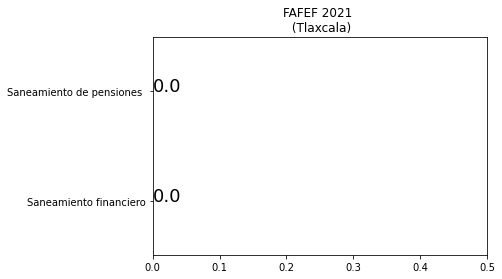

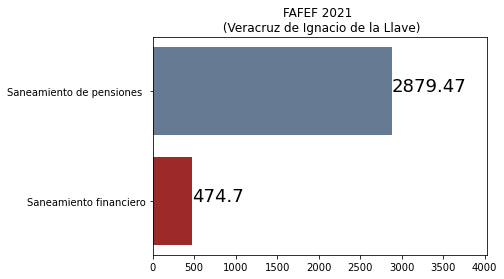

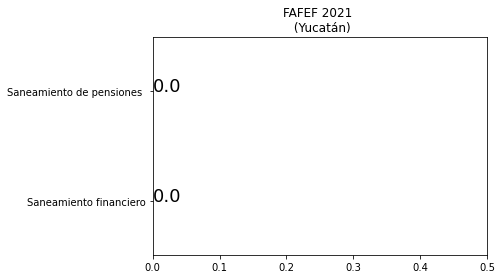

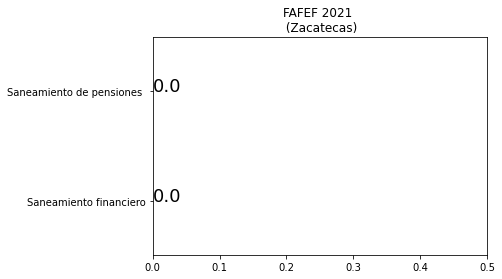

In [46]:
i=0
while i<33:
    graficos_FAFEF(df.iloc[i:i+1, :], colores=colores, seed=15)
    i+=1